# Ch04 圖解神經網路-多層感知器(MLP)

複習一下公式 : $z = (\sum_{i=1}^n w_ix_i)+b$

## 4-1 線性不可分問題
簡單來說: 線性不可分的問題就是無法解決不能用一條線將資料分成兩類的問題. 
圓點是1; 方塊是0;
使用單一感知器並無法解決這種問題, 因此需要使用多層感知器來解決線性不可分的問題

## 4-2 認識多層感知器(MLP)
事實上就是神經網路

### 4-2-1 使用二層感知器解決XOR問題
真值表

| x1 | x2 | out |
|:----:|:----:|:----:|
| 0 | 0 | 0 | 
| 0 | 1 | 1 | 
| 1 | 0 | 1 | 
| 1 | 1 | 0 | 

所以用二個感知器 `h1()` 和 `h2()` 函數

$h1(x1, x2) = x1 + x2 - 0.5$

$h2(x1, x2) = x1 + x2 - 1.5$

複習 : wx + b > 0 ==> 1

`h1()` 函數所得如下

$h1(0,0) = f(1*0+1*0-0.5) = f(-0.5) = 0$

$h1(0,1) = f(1*0+1*1-0.5) = f(0.5) = 1$

$h1(1,0) = f(1*1+1*0-0.5) = f(0.5) = 1$

$h1(1,1) = f(1*1+1*1-0.5) = f(1.5) = 1$

得到的是OR_GATE

`h2()` 函數所得如下

$h2(0,0) = f(1*0+1*0-1.5) = f(-0.5) = 0$

$h2(0,1) = f(1*0+1*1-1.5) = f(0.5) = 0$

$h2(1,0) = f(1*1+1*0-1.5) = f(0.5) = 0$

$h2(1,1) = f(1*1+1*1-1.5) = f(1.5) = 1$

得到的是 AND_GATE

現在, 建立新函數 `o1(h1, h2)`

$(x1, x2) = (0, 0) --> o1(h1, h2) = (0, 0)$

$(x1, x2) = (0, 1) --> o1(h1, h2) = (1, 0)$

$(x1, x2) = (1, 0) --> o1(h1, h2) = (1, 0)$

$(x1, x2) = (1, 1) --> o1(h1, h2) = (1, 1)$

調整權重w1=1, w2=-2, bias=-0.5 , 輸出結果如下

$(x1, x2) = (0, 0) --> o1(h1, h2) = (0, 0) --> f(1*0-2*0-0.5) = f(-0.5) = 0 $

$(x1, x2) = (0, 1) --> o1(h1, h2) = (1, 0) --> f(1*1-2*0-0.5) = f(0.5) = 0 $

$(x1, x2) = (1, 0) --> o1(h1, h2) = (1, 0) --> f(1*1-2*0-0.5) = f(0.5) = 0 $

$(x1, x2) = (1, 1) --> o1(h1, h2) = (1, 1) --> f(1*1-2*1-0.5) = f(-1.5) = 0 $



In [3]:
#XOR 二層感知器
#Ch4_2_1.py
import numpy as np

class Perceptron:
    def __init__(self,input_length, weights=None, bias=None):
        if weights is None:
            self.weights = np.ones(input_length)*1
        else:
            self.weights = weights
        
        if bias is None:
            self.bias = -1
        else:
            self.bias = bias

    @staticmethod
    def activation_function(x):
        if x > 0:
            return 1
        return 0

    def __call__(self, input_data):
        w_input = self.weights * input_data
        w_sum = w_input.sum() + self.bias
        return Perceptron.activation_function(w_sum), w_sum

weights = np.array([1,1])
bias = -0.5
h1 = Perceptron(2, weights, bias)

weights = np.array([1,1])
bias = -1.5
h2 = Perceptron(2, weights, bias)

weights = np.array([1,-2])
bias = -0.5
o1 = Perceptron(2, weights, bias)

input_data = [np.array([0,0]), np.array([0,1]),
              np.array([1,0]), np.array([1,1])]

for x in input_data:
    out1, w1 = h1(np.array(x))
    out2, w2 = h2(np.array(x))
    print(out1,w1,out2,w2)
    new_point = np.array([w1, w2])
    new_input = np.array([out1,out2])
    out, w = o1(new_input)
    print(x, new_point, new_input, w, out)

0 -0.5 0 -1.5
[0 0] [-0.5 -1.5] [0 0] -0.5 0
1 0.5 0 -0.5
[0 1] [ 0.5 -0.5] [1 0] 0.5 1
1 0.5 0 -0.5
[1 0] [ 0.5 -0.5] [1 0] 0.5 1
1 1.5 1 0.5
[1 1] [1.5 0.5] [1 1] -1.5 0


### 4-2-2 多層感知器就是神經網路
如果多層感知器有 2 層隱藏層, 共 4 層神經網路, 這就是深度神經網路, 即深度學習.

神經網路的每一層神經層, 其每一個頂點都會連接下一層的所有頂點, 稱為**全連接(Full Connected)**, 這種神經層稱為**密集層(Dense Layer)**, 而這種神經網路稱為**密集連接神經網路(Dense Connected Neural Network)**

## 4-3 神經網路的學習過程-正向與反向傳播

### 4-3-1 神經網路的學習方式與學習目標

神經網路的學習目標就是找出正確方權重值來縮小損失(Loss, 也就是實際值與預測值之間的差距), 這些權重也稱為神經網路的**參數**



### 神經網路的訓練迴圈
1. 初始權重值
2. 使用正向傳播計算預測值
3. 評估預測值與真實值誤差的損失
4. 使用反向傳播計算更新權限的比例
5. 更新權重繼續下一次訓練



## 4-4 啟動函數與損失函數

* Sigmoid 函數

$f(x) = \frac {1}{1+e^{-x}}$

一條值在 0~ 1之間的曲線


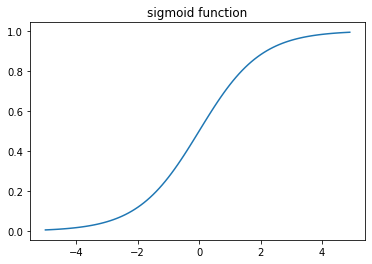

In [11]:
# Sigmoid function
# Ch4_4_1.py

import numpy as np
import matplotlib.pyplot as plt

def sigmoid(x):
    return 1/(1+(np.e**(-x)))  

x = np.arange(-5,5,0.1)

plt.plot(x,sigmoid(x))
plt.title("sigmoid function")
plt.show()

[-6 -5 -4 -3 -2 -1  0  1  2  3  4  5]


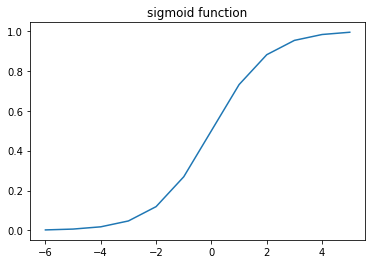

In [7]:
import numpy as np
import matplotlib.pyplot as plt

def sigmoid(x):
    return 1/(1+(np.e**(-x)))  

x = np.arange(-6,6) #產生-6~5的list
print(x)
plt.plot(x,sigmoid(x))
plt.title("sigmoid function")
plt.show()

x = np.arange(-6,6,0.1) 曲線比較圓 

$\frac{\partial f(x)}{\partial x} = (\frac {1}{1+e^{-x}})' = ((1+e^{-x})^{-1})' = (e^{-x})(1+e^{-x})^{-2}$  

參考網址 : en.wikipedia.ort/wiki/Activation_function

[-6 -5 -4 -3 -2 -1  0  1  2  3  4  5]


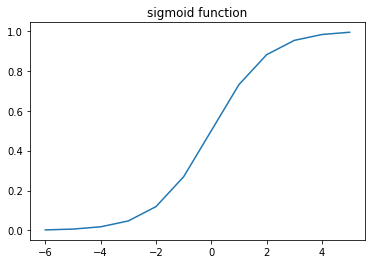

In [4]:
import numpy as np
import matplotlib.pyplot as plt

def sigmoid(x):
    return 1/(1+(np.e**(-x)))  

x = np.arange(-6,6) #產生-6~5的list
print(x)
plt.plot(x,sigmoid(x))
plt.title("sigmoid function")
plt.show()

### 4-4-1 啟動函數 - ReLU函數

$ f(x) = max(0,x)$

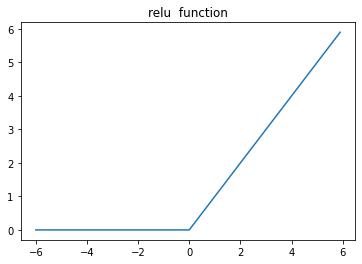

In [3]:
# ReLU
# Ch4_4_1a.py

import numpy as np
import matplotlib.pyplot as plt

def relu(x):
    return np.maximum(0,x)

x = np.arange(-6,6,0.1)

plt.plot(x,relu(x))
plt.title("relu  function")
plt.show()

Tanh函數 pyperbolic tangent

$f(x) = \frac {sinh(x)}{cosh(x)}$

輸出範圍是在-1~1之間 

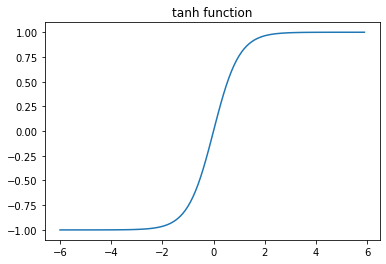

In [2]:
import numpy as np
import matplotlib.pyplot as plt

def tanh(x):
    return np.tanh(x)

x = np.arange(-6, 6, 0.1)

plt.plot(x, tanh(x))
plt.title("tanh function")
plt.show()


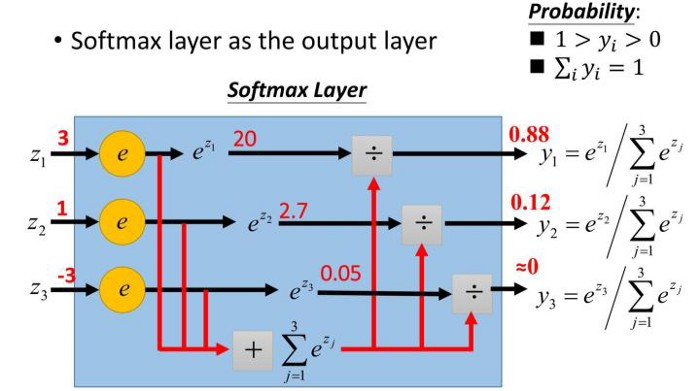

In [16]:
import numpy as np
import matplotlib.pyplot as plt

def softmax(x):
    return np.exp(x)/sum(np.exp(x))

x = np.array([1,2,3,4,1,2,3])

y = softmax(x)
print(y)

#plt.plot(x,softmax(x))
#plt.title("softmax  function")
#plt.show()

[0.02364054 0.06426166 0.1746813  0.474833   0.02364054 0.06426166
 0.1746813 ]


### 4-4-2 損失函數 Loss Function

* 均方誤差 Mean Square Error

import numpy as np

def MSE(y, t):
    return 0.5*np.sum((y-t)**2)

y_data = np.array([0.5,2.1,1.5,3.8,0.7,1.8,3.4])
t_data = np.array([1,2,3,4,1,2,3])

print(MSE(y_data, t_data))


* 交叉熵(Cross-Entropy)

資訊量 : 是使用對數 `log` 表示, $log_{2} 0.5 = log_{2}  2^{-1} = -1$

$H(X_{i}) = -log_{2} P$

* 資訊熵(Information Entropy)

$H(X) = - \sum_x P(x) log_{2}P(x)$

* 交叉熵

$H(X,Y) = - \sum_{i=1}^n P(x_{i}) log_{2}P(Y_{i})$

* 梯度下降法的數學公式

$w^1 = w^0 - \alpha \frac {\partial L(w)}{\partial w^0}$

單變數函數 : $L(w)= w^2$

函數的微分 : $\frac {\partial L(w)}{\partial w} = 2w $

[5.         3.         1.8        1.08       0.648      0.3888
 0.23328    0.139968   0.0839808  0.05038848 0.03023309]


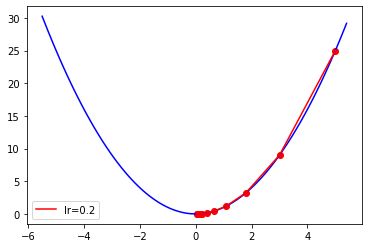

In [30]:
#單變數函數的梯度下降法實例
#Ch4_5_1.py

import numpy as np
import matplotlib.pyplot as plt

def L(w): 
    return w * w

def dL(w):
    return 2 * w

def gradient_descent(w_start, df, lr, epochs):    
    w_gd = []
    w_gd.append(w_start) 
    pre_w = w_start   
    
    for i in range(epochs):         
        w = pre_w - lr * df(pre_w)      
        w_gd.append(w)    
        pre_w = w
    return np.array(w_gd)

w0 = 5   
epochs = 10
lr = 0.2
w_gd = gradient_descent(w0, dL, lr, epochs) 
print(w_gd)

t = np.arange(-5.5, 5.5, 0.1)
plt.plot(t, L(t), c='b')
plt.plot(w_gd, L(w_gd), c='r', label='lr={}'.format(lr))    
plt.scatter(w_gd, L(w_gd), c='r')    
plt.legend()
plt.show()

* 多變數函數的梯度下降法實例

回家練習

### 4-5-2 反向傳播演算法 Backpropagation

整個演算法分三個階段
* 前向傳播階段
* 反向傳播階段
* 權重更新階段

**啟動函數改用 `Sigmoid` 函數** , 只有 0~1




複習 : 

$(e^{-x})' = -e^{-x}$ 
    
$(e^{x})' = e^x$

$ ((3x^2+5x+8)^3)' = \frac {\partial (3x^2+5x+8)^3}{\partial (3x^2+5x+8)} \frac {\partial(3x^2+5x+8)}{\partial x} = 3(3x^2+5x+8)^2)(6x+5)$

## 4-6 神經網路的樣本和標籤資料

樣本是用來訓練神經網路的資料集, 標籤是每一個樣本對應的真實標值, 這些資料都是不同維度的張量

### 4-6-1 標籤資料 - One-hot編碼 

把它變向量, 只有1是真實值

### 4-6-2 樣本資料 - 特徵標準化 

* 正規化 : 0 ~ 1 之間

$ X_{norm} = \frac {X - X_{min}}{X_{max}   - X_{min}}$



訓練, 驗證和測試資料集

80%的資料是用來訓練, 20% 的資料是測試資料 